In [1]:
# Importing libraries
import numpy as np  #For numerical operations
import pandas as pd #For data handling
import matplotlib.pyplot as plt #For visualization
from collections import Counter #For counting labels
import time  #To measure prediction time

In [3]:
# Load the CSV file
df = pd.read_csv('mnist_test.csv')  
print(df.shape)
df.head()

(10000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
labels = df.iloc[:, 0].values # First column is the digit (label)
pixels = df.iloc[:, 1:].values  # Remaining columns are pixel values

In [5]:
pixels = pixels / 255.0 # Normalize the pixel value

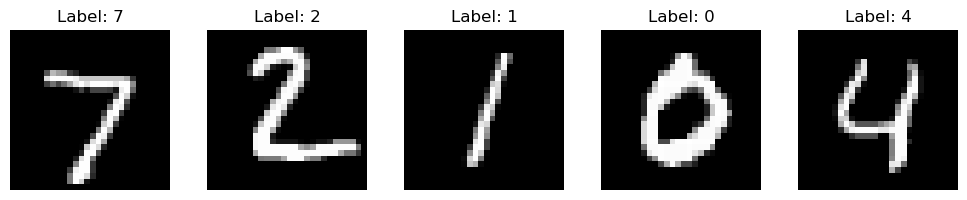

In [6]:
# Visualize Some Sample Digits
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(pixels[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
# Use only a subset for faster computation (KNN is slow)
X_sample = pixels[:500]      # First 500 images
y_sample = labels[:500]

X_test = pixels[500:600]     # Next 100 for testing
y_test = labels[500:600]

In [8]:
def euclidean_distance(a, b):
    '''
    Compute the Euclidean distance between two vectors a and b.
    Formula: sqrt(Σ (ai - bi)^2)
    '''
    return np.sqrt(np.sum((a - b) ** 2))

class KNNClassifier:
    # k: Number of nearest neighbors to consider
    def __init__(self, k=3):
        self.k = k
        
    def fit(self, X, y):
         """
        Just memorizes the training data.
        X: feature vectors
        y: corresponding labels
        """
        self.X_train = X
        self.y_train = y
        
    def predict(self, X):
         """
        Predict the label for each instance in X.
        For each test sample:
        - Compute distance to all training points
        - Get k nearest labels
        - Return the most common label (majority vote)
        """
        predictions = []
        for x in X:
            # Step 1: Compute distances
            distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
             # Step 2: Find indices of k closest neighbors
            k_indices = np.argsort(distances)[:self.k]
            # Step 3: Get the corresponding labels
            k_labels = [self.y_train[i] for i in k_indices]
            # Step 4: Find the most common label
            most_common = Counter(k_labels).most_common(1)[0][0]
            predictions.append(most_common)
        return np.array(predictions)


In [9]:
# Train and Predict
knn = KNNClassifier(k=3)
knn.fit(X_sample, y_sample)

start = time.time()
predictions = knn.predict(X_test)
end = time.time()

print(f"Prediction time for {len(X_test)} samples: {end - start:.2f} seconds")

Prediction time for 100 samples: 2.28 seconds


In [10]:
accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 79.00%


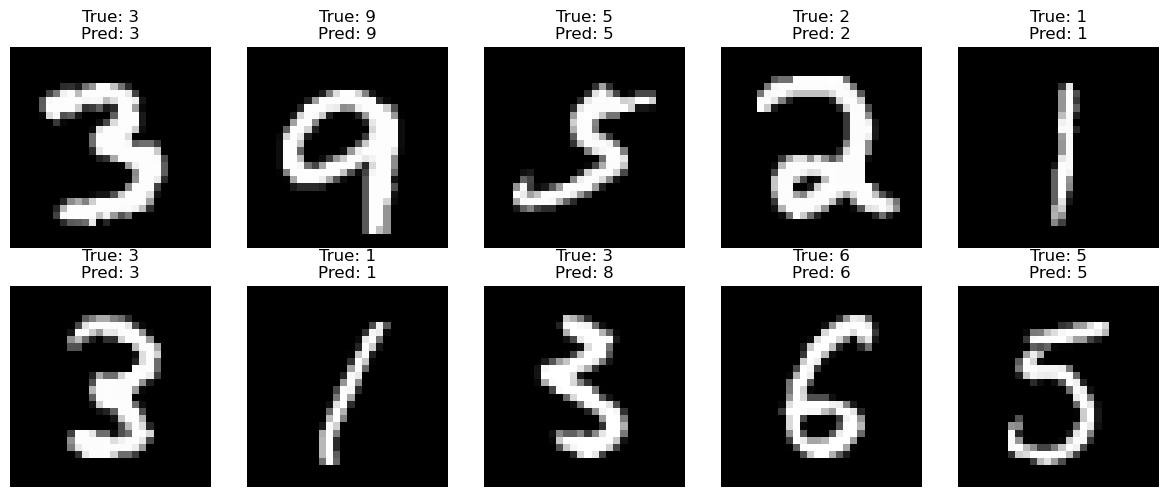

In [11]:
# Visualize Predictions
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i]}\nPred: {predictions[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## Why I chose KNN

* KNN is simple to understand and easy to implement.

* It works well for small to medium-sized datasets like MNIST.

* It does not require a training phase, making it quick to set up.

* KNN uses distance-based comparison, which works effectively on normalized image data.

* It provides a good baseline model to compare with more advanced methods later.

In [16]:
!pip install -r requirements.txt